In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
from IPython import display
from PIL import Image
import cv2

### Laplace equation

```
    nvcc heat_eq.cu
    ./a.out
```
To specify the size of array change N variable in the code.

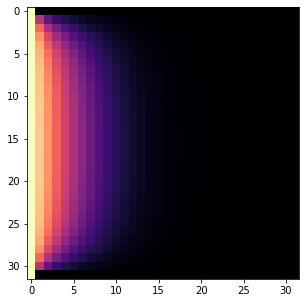

In [188]:
# size N = 32
data = np.loadtxt("out_32.txt")
N = np.sqrt(data.shape[1]).astype('int')
for i, matrix in enumerate(data):
    
    plt.figure(figsize=(5, 5))
    matrix = matrix.reshape((N, N))
    display.clear_output(wait=True)
    plt.imshow(matrix, cmap='magma')
    plt.show()
    
    time.sleep(0.00001)

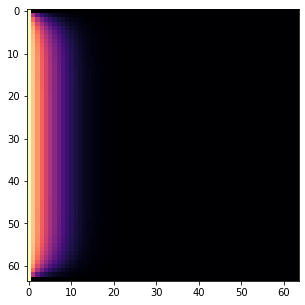

In [189]:
# size N=64
data = np.loadtxt("out_64.txt")
N = np.sqrt(data.shape[1]).astype('int')

for i, matrix in enumerate(data):
    
    plt.figure(figsize=(5, 5))
    matrix = matrix.reshape((N, N))
    display.clear_output(wait=True)
    plt.imshow(matrix, cmap='magma')
    plt.show()
    
    time.sleep(0.00001)

### Changing image

Libraries for image processing was used [stb_image.h](https://github.com/nothings/stb/blob/master/stb_image.h) and [stb_image_write.h](https://github.com/nothings/stb/blob/master/stb_image_write.h). Kernels were taken from [wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

```
   nvcc blur.cu -I./
   ./a.out kernel_name 
```

kernel_name: gaussian, sharpen or edge. <br>
The output picture is ```changed_baby_yoda.png```

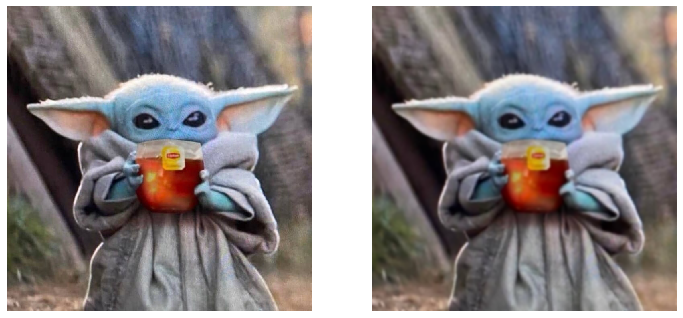

In [190]:
# Gaussian blurring 10 iterations
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(Image.open("baby_yoda.png"))
plt.axis("off")

plt.subplot(122)
plt.imshow(Image.open("baby_yoda_blurred.png"))
plt.axis("off")
plt.show()

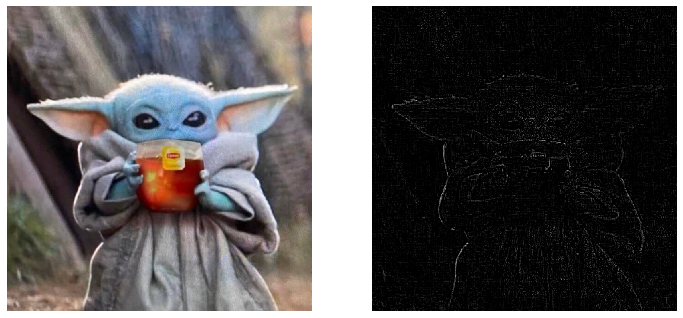

In [191]:
# Something which should be similar to edges
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(Image.open("baby_yoda.png"))
plt.axis("off")

plt.subplot(122)
image = np.array(Image.open("baby_yoda_edge.png"))
plt.imshow((image[:, :, 2]) , cmap='gray')
plt.axis("off")
plt.show()

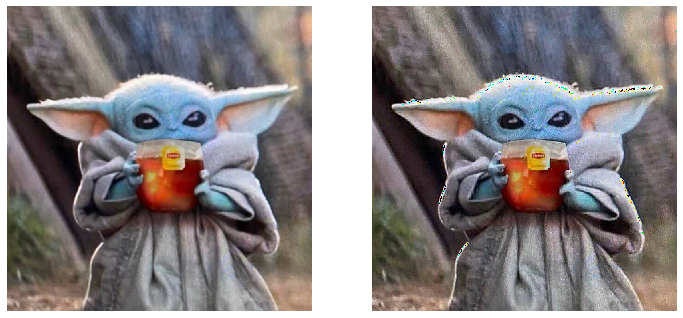

In [192]:
# sharpen the image, it's can be seen that a cup of tea and his coat became sharper
# but i treated the pixels with values < 0 as 0, so probably because of that, 
# some of them became painted in strange colours

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(Image.open("baby_yoda.png"))
plt.axis("off")

plt.subplot(122)
image = np.array(Image.open("baby_yoda_sharpen.png"))
plt.imshow(image)
plt.axis("off")
plt.show()

### Median filter

```
    nvcc blur_non_linear.cu -I./
    ./a.out
```

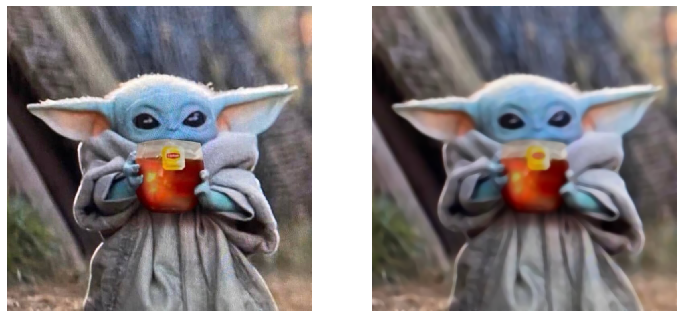

In [177]:
# the size of filter is 10, this might look like a cartoon effect
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(Image.open("baby_yoda.png"))
plt.axis("off")

plt.subplot(122)
plt.imshow(Image.open("baby_yoda_median.png"))
plt.axis("off")
plt.show()

### Histogram plot

input image has three channels and its $height \cdot width$ should be divisible by 256.

```
    nvcc histogram.cu -I./
    ./a.out
```
The output picture is ```changed_baby_yoda.png```

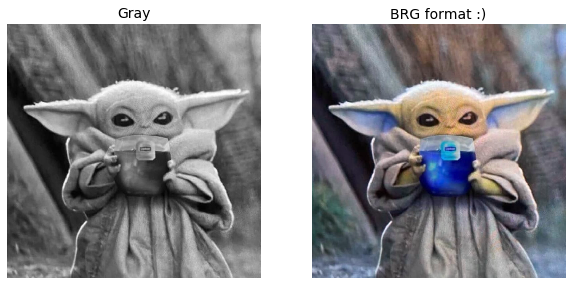

In [202]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
im = Image.open("baby_yoda.png")
image = np.array(im.resize((1024, 1024))) / 256
image = ((image[:,:,0] + image[:,:,1] + image[:,:,2]) / 3)
plt.imshow(image, cmap='gray')
plt.title("Gray", fontsize=14)
plt.axis("off")

cv2.imwrite("baby_yoda_resized.png", np.array(im.resize((1024, 1024))))
plt.subplot(122)
plt.imshow(Image.open("baby_yoda_resized.png"))
plt.axis("off")
plt.title("BRG format :)", fontsize=14)
plt.show()

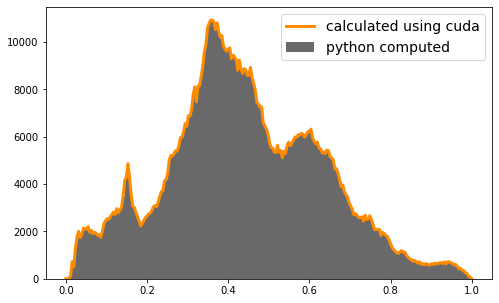

In [227]:
# Histograms
plt.figure(figsize=(8, 5))
plt.hist(image.ravel(), bins=256, range=(0.0, 1.0), fc='dimgray', label='python computed')
plt.plot(np.linspace(0, 1, 256), hist_data, color='darkorange', linewidth=3, label="calculated using cuda")
plt.legend(loc='upper right', fontsize=14)
plt.show()